In [1]:
!pip install -U spacy

In [2]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 43.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
!pip install wordcloud

In [4]:
!pip install nltk

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Text processing libraries
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Machine learning libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Sentiment analysis
from textblob import TextBlob

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [8]:
# Data Exploration and Preprocessing

# Load the dataset
df = pd.read_csv('/content/blogs.csv')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [9]:
# Display basic information
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())
print("\nCategory distribution:")
print(df['Labels'].value_counts())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None

First few rows:
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

Category distribution:
Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos             

In [53]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back to string
    return ' '.join(tokens)

# Apply preprocessing to the text data
df['processed_text'] = df['Data'].apply(preprocess_text)

In [56]:
preprocess_text(df['Data'][0])

'path cantaloupesrvcscmuedumagnesiumclubcccmuedunewsseicmueducisohiostateeduzaphodmpsohiostateeduhowlandrestonansnetagatedocicacukuknetmcsungermanyeunetthothmchpsnidehorusapmchpsnided012s658frank frankd012s658uucp frank odwyer newsgroups altatheism subject islamic genocide date 23 apr 1993 235147 gmt organization siemensnixdorf ag line 110 distribution world messageid 1r9vej5k5horusapmchpsnide reference 1r4o8a6qefidoasdsgicom 1r5ublbd6horusapmchpsnide 1r76ek7uofidoasdsgicom nntppostinghost d012s658apmchpsnide article 1r76ek7uofidoasdsgicom liveseysolntzewpdsgicom jon livesey writes article 1r5ublbd6horusapmchpsnide frankd012s658uucp frank odwyer writes article 1r4o8a6qefidoasdsgicom liveseysolntzewpdsgicom jon livesey writes noting particular society case mainland uk religously motivated murder murder kind say little whether interreligion murder elsewhere religiously motivated allows one conclude nothing inherent religion matter catholicism protestantism motivates one kill motivates al

In [17]:
# Naive Bayes Model for Text Classification

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['processed_text'])
y = df['Labels']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.83      0.64        18
           comp.graphics       0.75      0.83      0.79        18
 comp.os.ms-windows.misc       0.82      0.82      0.82        22
comp.sys.ibm.pc.hardware       0.80      0.80      0.80        25
   comp.sys.mac.hardware       0.86      0.90      0.88        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.92      0.67      0.77        18
               rec.autos       0.94      0.94      0.94        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.75      1.00      0.86        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.86      0.95      0.90        19
         sci.electronics       0.75      0.75      0.75        16
                 sci.med       0.88      0.88      


Sentiment distribution by category:
sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                      5       60        35
comp.graphics                   10       51        39
comp.os.ms-windows.misc          9       48        43
comp.sys.ibm.pc.hardware         6       49        45
comp.sys.mac.hardware            7       50        43
comp.windows.x                  10       53        37
misc.forsale                     7       33        60
rec.autos                        7       48        45
rec.motorcycles                  7       49        44
rec.sport.baseball               8       53        39
rec.sport.hockey                13       56        31
sci.crypt                        3       62        35
sci.electronics                  4       56        40
sci.med                         11       56        33
sci.space                        5       53        42
soc.religion.christian           1       61  

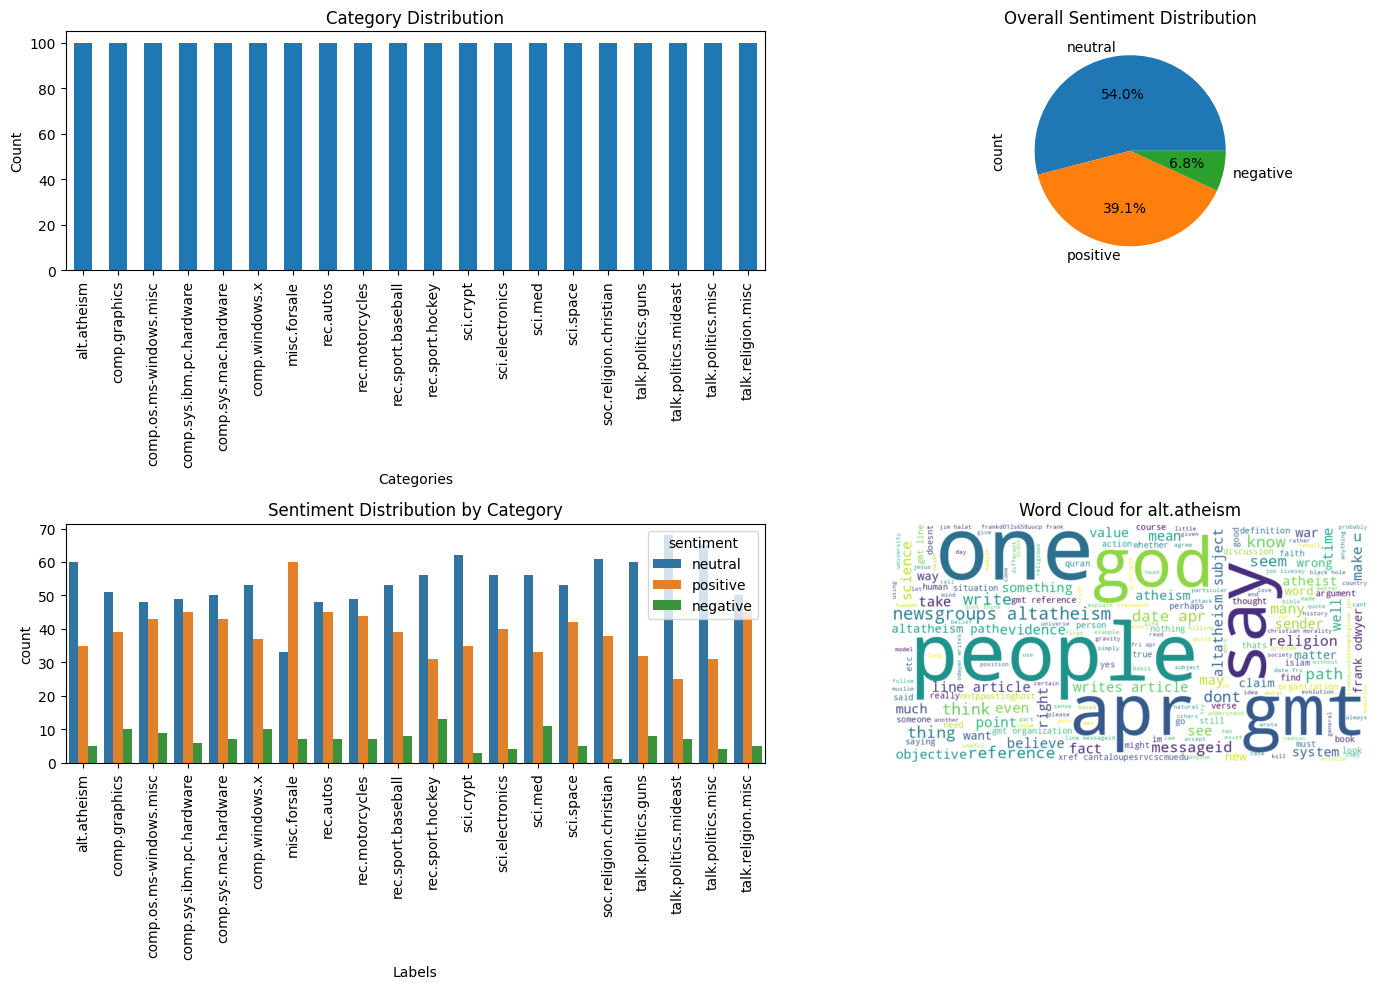

In [46]:
# Sentiment Analysis

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.1:
        return 'positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to original text (not preprocessed)
df['sentiment'] = df['Data'].apply(get_sentiment)

# Analyze sentiment distribution by category
print("\nSentiment distribution by category:")
print(df.groupby(['Labels', 'sentiment']).size().unstack())

# Visualizations
plt.figure(figsize=(15, 10))

# Category distribution
plt.subplot(2, 2, 1)
df['Labels'].value_counts().plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Categories')
plt.ylabel('Count')

# Sentiment distribution
plt.subplot(2, 2, 2)
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Overall Sentiment Distribution')
print("\n")

# Sentiment by category
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Labels', hue='sentiment')
plt.title('Sentiment Distribution by Category')
plt.xticks(rotation=90)

# Word cloud for a specific category (alt.atheism)
plt.subplot(2, 2, 4)
atheism_text = ' '.join(df[df['Labels'] == 'alt.atheism']['processed_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(atheism_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for alt.atheism')
plt.axis('off')

plt.tight_layout()
plt.show()


In [51]:
# Evaluation and Discussion

# Feature importance for Naive Bayes
feature_names = tfidf_vectorizer.get_feature_names_out()
top_features = np.argsort(nb_classifier.feature_log_prob_[0])[-20:]
print("\nTop features for classification:")
print([feature_names[i] for i in top_features])

# Discussion points
print("\nKey Observations:")
print("1. The Naive Bayes classifier achieved reasonable accuracy for text classification.")
print("2. The sentiment analysis reveals the overall tone of discussions in each category.")
print("3. Some categories may have more polarized sentiments than others.")
print("4. The word cloud provides insight into common terms in specific categories.")


Top features for classification:
['religion', 'frank', 'odwyer', 'reference', 'one', 'dont', 'science', 'morality', 'article', 'atheism', 'people', 'would', 'value', 'say', 'writes', 'keith', 'atheist', 'god', 'objective', 'altatheism']

Key Observations:
1. The Naive Bayes classifier achieved reasonable accuracy for text classification.
2. The sentiment analysis reveals the overall tone of discussions in each category.
3. Some categories may have more polarized sentiments than others.
4. The word cloud provides insight into common terms in specific categories.
